In [ ]:
# Name: SASIRAJKUMAR
# Register No: 212222230137

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [4]:
single_image= X_train[16]

In [5]:
single_image.shape

(28, 28)

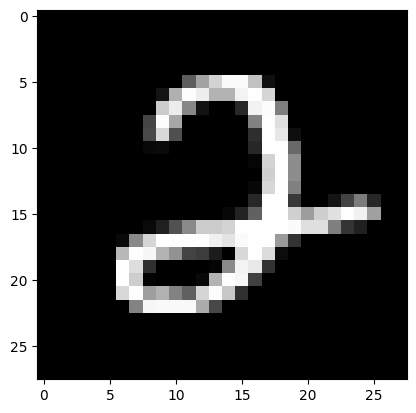

In [6]:
plt.imshow(single_image,cmap='gray')

In [7]:
y_train.shape

(60000,)

In [8]:
X_train.min()

0

In [9]:
X_train.max()

255

In [10]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [11]:
X_train_scaled.min()

0.0

In [12]:
X_train_scaled.max()

1.0

In [13]:
y_train[0]

5

In [14]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [15]:
type(y_train_onehot)

numpy.ndarray

In [16]:
y_train_onehot.shape

(60000, 10)

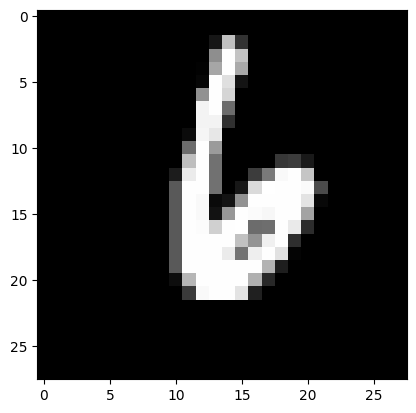

In [17]:
single_image = X_train[204]
plt.imshow(single_image,cmap='gray')

In [18]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [20]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16, kernel_size=(9,9), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(3,3)))
model.add(layers.Flatten())
model.add(layers.Dense(65,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 16)        1312      
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 16)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 65)                37505     
                                                                 
 dense_1 (Dense)             (None, 10)                660       
                                                                 
Total params: 39477 (154.21 KB)
Trainable params: 39477 (154.21 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [22]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 26s 27ms/step - loss: 0.2455 - accuracy: 0.9287 - val_loss: 0.0839 - val_accuracy: 0.9750
Epoch 2/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0757 - accuracy: 0.9769 - val_loss: 0.0511 - val_accuracy: 0.9846
Epoch 3/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0541 - accuracy: 0.9832 - val_loss: 0.0403 - val_accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0428 - accuracy: 0.9863 - val_loss: 0.0388 - val_accuracy: 0.9882
Epoch 5/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0345 - accuracy: 0.9887 - val_loss: 0.0378 - val_accuracy: 0.9886


In [23]:
metrics = pd.DataFrame(model.history.history)

In [24]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.245549,0.928683,0.083931,0.9750
1,0.075685,0.976900,0.051146,0.9846
2,0.054076,0.983150,0.040283,0.9894
3,0.042770,0.986333,0.038774,0.9882
4,0.034535,0.988750,0.037767,0.9886


212222230137 SASIRAJKUMAR T J


<Axes: >

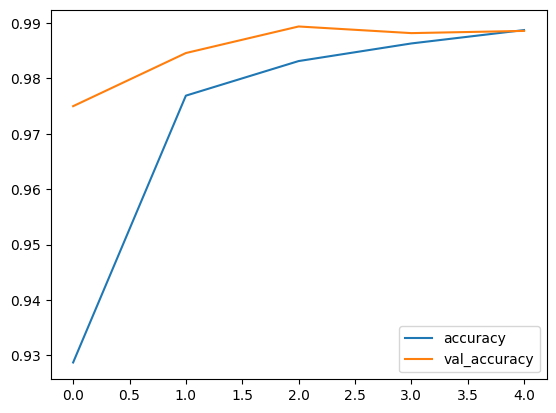

In [25]:
print("212222230137 SASIRAJKUMAR T J")
metrics[['accuracy','val_accuracy']].plot()

212222230137 SASIRAJKUMAR T J


<Axes: >

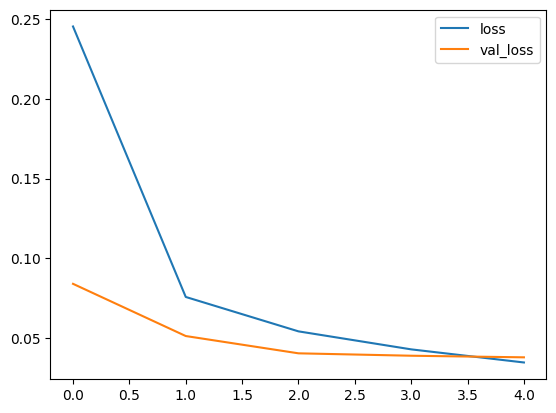

In [26]:
print("212222230137 SASIRAJKUMAR T J")
metrics[['loss','val_loss']].plot()

In [27]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 4ms/step


In [28]:
print("212222230137 SASIRAJKUMAR T J")
print("\n")
print(confusion_matrix(y_test,x_test_predictions))

212222230137 SASIRAJKUMAR T J


[[ 976    1    0    0    0    0    2    1    0    0]
 [   0 1132    0    0    0    1    2    0    0    0]
 [   1    3 1022    1    0    0    1    3    1    0]
 [   0    0    3  999    0    6    0    1    0    1]
 [   0    0    2    0  977    0    1    0    0    2]
 [   2    0    1    4    0  882    1    1    0    1]
 [   4    2    0    1    2    7  942    0    0    0]
 [   0    3    6    1    0    1    0 1015    1    1]
 [  10    0    4    2    2    4    1    3  940    8]
 [   0    1    0    0    4    2    0    1    0 1001]]


In [29]:
print("212222230137 SASIRAJKUMAR T J")
print("\n")
print(classification_report(y_test,x_test_predictions))

212222230137 SASIRAJKUMAR T J


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [31]:
img = image.load_img('6.PNG')

In [32]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [34]:
img = image.load_img('6.PNG')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [35]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 26ms/step


In [36]:
print(x_single_prediction)

[5]


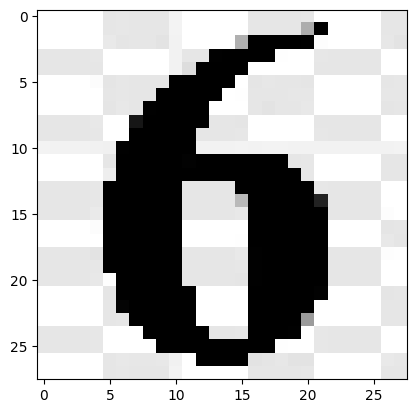

In [37]:
import matplotlib.pyplot as plt
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [38]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [39]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 32ms/step


In [40]:
print(x_single_prediction)

[6]
